# Gas Consumption by Star Formation

The goal of this code it to see whether gas consumption by ongoing star formation plays a significant role in removing gas. 

`-- Hollis Akins, May 25 2021 --`

In [1]:
from analysis import *

## Binned gas-loss rate due to SF

In [2]:
data_all = read_all_ram_pressure()

1 Returning (ejected, cooled, expelled, accreted) for h148-13...
2 Returning (ejected, cooled, expelled, accreted) for h148-28...
3 Returning (ejected, cooled, expelled, accreted) for h148-37...
4 Returning (ejected, cooled, expelled, accreted) for h148-45...
5 Returning (ejected, cooled, expelled, accreted) for h148-68...
6 Returning (ejected, cooled, expelled, accreted) for h148-80...
7 Returning (ejected, cooled, expelled, accreted) for h148-283...
8 Returning (ejected, cooled, expelled, accreted) for h148-278...
9 Returning (ejected, cooled, expelled, accreted) for h148-329...
10 Returning (ejected, cooled, expelled, accreted) for h229-20...
11 Returning (ejected, cooled, expelled, accreted) for h229-22...
12 Returning (ejected, cooled, expelled, accreted) for h229-23...
13 Returning (ejected, cooled, expelled, accreted) for h229-27...
14 Returning (ejected, cooled, expelled, accreted) for h229-55...
15 Returning (ejected, cooled, expelled, accreted) for h242-24...
16 Returning (ej

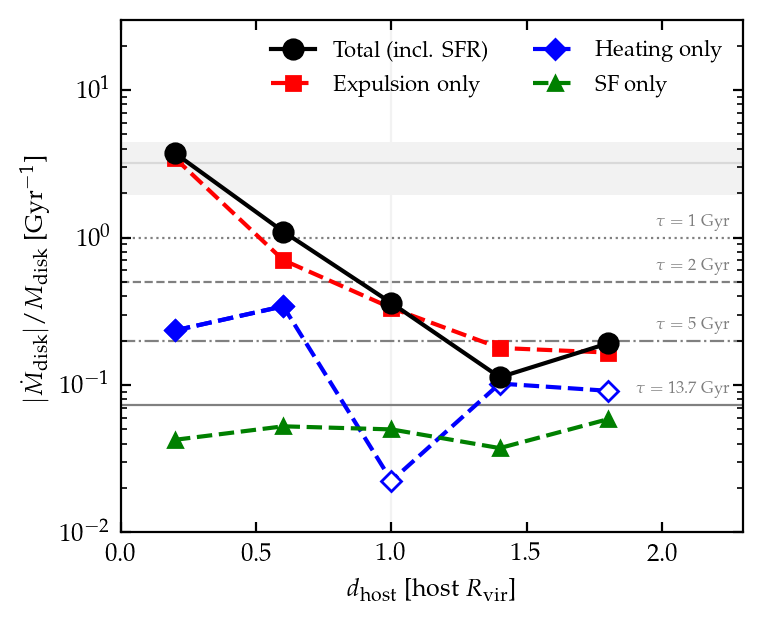

In [21]:
import scipy.stats

dist = np.array(data_all.h1dist/data_all.hostRvir)
bins = np.arange(0, 2.2, 0.4)
bc = 0.5*(bins[1:]+bins[:-1])

fig, ax = plt.subplots(1,1, figsize=(3.7, 3))

def netOutIn(y):
    return np.sum(y[y >= 0]) + np.sum(y[y < 0])

def sumif(y):
    return np.sum(y[~np.isnan(y)])

y = data_all.Mdot_ejected - data_all.Mdot_cooled + data_all.Mdot_expelled_disk - data_all.Mdot_accreted_disk + data_all.SFR * 1e9
ydiv = data_all.Mdisk_div
net, bin_edges, binnumber = scipy.stats.binned_statistic(dist, y, bins=bins, statistic=netOutIn)
div, bin_edges, binnumber = scipy.stats.binned_statistic(dist, ydiv, bins=bins, statistic=sumif)
x, y = dist, y/ydiv
# ax.scatter(x[y > 0], y[y > 0], facecolor='0.8', edgecolor='0.8', s=10)
# ax.scatter(x[y < 0], -y[y < 0], facecolor='none', edgecolor='0.8', s=10)
ax.plot(bc, net/div, 'ko-', label='Total (incl. SFR)', zorder=100, ms=7)

y = data_all.Mdot_expelled_disk - data_all.Mdot_accreted_disk
net, bin_edges, binnumber = scipy.stats.binned_statistic(dist, y, bins=bins, statistic=netOutIn)
div, bin_edges, binnumber = scipy.stats.binned_statistic(dist, ydiv, bins=bins, statistic=sumif)
ax.plot(bc, net/div, 'ro--', label='Expulsion only', zorder=50, ms=5, marker='s')

y = data_all.Mdot_ejected - data_all.Mdot_cooled 
net, bin_edges, binnumber = scipy.stats.binned_statistic(dist, y, bins=bins, statistic=netOutIn)
div, bin_edges, binnumber = scipy.stats.binned_statistic(dist, ydiv, bins=bins, statistic=sumif)

ax.plot(bc, np.abs(net/div), 'bo--', mfc='w', ms=5, zorder=10, marker='D')
ax.plot(bc[(net/div)>0], (net/div)[(net/div)>0], 'bo--', label='Heating only', ms=5, zorder=10, marker='D')


y = data_all.SFR * 1e9
net, bin_edges, binnumber = scipy.stats.binned_statistic(dist, y, bins=bins, statistic=netOutIn)
div, bin_edges, binnumber = scipy.stats.binned_statistic(dist, ydiv, bins=bins, statistic=sumif)
ax.plot(bc, net/div, 'g^--', label='SF only', zorder=50, ms=5)

ax.plot([0,4], [1, 1], linewidth=0.8, linestyle=':', color='0.5', zorder=-300)
ax.plot([0,4], [0.5, 0.5], linewidth=0.8, linestyle='--', color='0.5', zorder=-300)
ax.plot([0,4], [0.2, 0.2], linewidth=0.8, linestyle='-.', color='0.5', zorder=-300)
ax.plot([0,4], [1/13.7, 1/13.7], linewidth=0.8, linestyle='-', color='0.5', zorder=-300)
ax.annotate(r'$\tau = 1~{\rm Gyr}$', (2.25, 1.2), color='0.5', fontsize=6, ha='right')
ax.annotate(r'$\tau = 2~{\rm Gyr}$', (2.25, 0.5*1.2), color='0.5', fontsize=6, ha='right')
ax.annotate(r'$\tau = 5~{\rm Gyr}$', (2.25, 0.2*1.2), color='0.5', fontsize=6, ha='right')
ax.annotate(r'$\tau = 13.7~{\rm Gyr}$', (2.25, 1/13.7*1.2), color='0.5', fontsize=6, ha='right')

mu = 1/np.mean(data_all.dt)
sigma = np.std(data_all.dt)/(np.mean(data_all.dt)**2)
ax.plot([0, 4],[mu]*2,color='0.85', linestyle='-', linewidth=0.8, zorder=-100)
ax.fill_between([0, 4],[mu-sigma]*2,[mu+sigma]*2, fc='0.95', zorder=-110)
ax.plot([1,1],[1e-3,1e3],color='0.95', linestyle='-', linewidth=0.8, zorder=-1000)

ax.semilogy()
ax.set_ylim(1e-2, 3e1)
ax.set_xlim(0,2.3)
ax.legend(fontsize=8, ncol=2)
ax.set_ylabel(r'$|\dot{M}_{\rm disk}|/M_{\rm disk}$ [Gyr$^{-1}$]')
ax.set_xlabel(r'$d_{\rm host}$ [host $R_{\rm vir}$]')
# ax.annotate('Net Cooling', xy=(1.05, 2.05e-2), xytext=(1.4, 1.5e-2), arrowprops=dict(arrowstyle='->', color='darkblue'), va='bottom', fontsize=7, color='darkblue')

plt.savefig('plots/SF_depletion.pdf')
plt.show()